In [134]:
#1.1 输出每个国家公元前2150年以来的伤亡人数总和
import pandas as pd
Sig_Eqs=pd.read_csv('earthquakes-2021-10-13_13-22-50_+0800.tsv',sep='\t')
Sig_Eqs.groupby('Country')['Deaths'].sum()

Country
AFGHANISTAN                             13068.0
ALBANIA                                  3092.0
ALGERIA                                 39339.0
ANTARCTICA                                  0.0
ANTIGUA AND BARBUDA                         0.0
                                         ...   
VENEZUELA                               44480.0
VIETNAM                                     0.0
WALLIS AND FUTUNA (FRENCH TERRITORY)        5.0
YEMEN                                    4192.0
ZAMBIA                                      0.0
Name: Deaths, Length: 156, dtype: float64

In [135]:
#1.1 输出前十个人口伤亡最多的国家
Sig_Eqs.groupby('Country')['Deaths'].sum().sort_values(ascending=False).head(10)

Country
CHINA         2074900.0
TURKEY        1074769.0
IRAN          1011437.0
SYRIA          439224.0
ITALY          434863.0
HAITI          323472.0
AZERBAIJAN     317219.0
JAPAN          278138.0
ARMENIA        191890.0
PAKISTAN       148783.0
Name: Deaths, dtype: float64

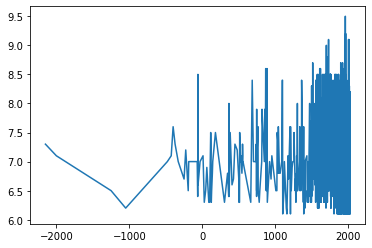

In [136]:
#1.2
import matplotlib.pyplot as plt
Sig_Eqs[Sig_Eqs['Mag']>6.0]['Mag'].count()
met=Sig_Eqs[Sig_Eqs['Mag']>6.0]
plt.plot(met['Year'],met['Mag'])

In [137]:
Sig_Eqs[Sig_Eqs['Mag']>6.0]['Mag'].count()

2870

In [138]:
#1.3
def CountEq_LargestEq():
    a=Sig_Eqs.groupby('Country')['Mag'].count()
    b=Sig_Eqs.groupby('Country')['Mag'].max()
    c = {'Country':a.index,'Total_Eqs':a.values}
    d = pd.DataFrame(c)
    e = {'Country':b.index,'Max_Eqs':b.values}
    f = pd.DataFrame(e)
    g=d.merge(f,on='Country')
    return g
name=input("input the country's name：")
Country_name=name.upper()
df=CountEq_LargestEq()
#The total number of earthquakes since 2150 B.C. in the given country is：
df[df['Country']==Country_name]['Total_Eqs']

input the country's name：china


28    579
Name: Total_Eqs, dtype: int64

In [139]:
#The date of the largest earthquake ever happened in the given country is:
b=Sig_Eqs.groupby('Country')['Mag'].max()
Sig_Eqs[(Sig_Eqs['Country']==Country_name)&(Sig_Eqs['Mag']==b[Country_name])]['Year']

973    1668.0
Name: Year, dtype: float64

In [140]:
#降序排列所有国家
CountEq_LargestEq().sort_values(['Total_Eqs','Max_Eqs'],ascending=[0,0])

,Country,Total_Eqs,Max_Eqs
28,CHINA,579,8.5
71,JAPAN,346,9.1
64,INDONESIA,321,9.1
65,IRAN,254,7.9
147,USA,218,9.2
...,...,...,...
90,MONTSERRAT,0,NaN
113,SAINT LUCIA,0,NaN
114,SAINT VINCENT AND THE GRENADINES,0,NaN
128,SRI LANKA,0,NaN
